In [1]:
import os
import glob
import numpy as np
import torch

from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing

import config 
import dataset
import matplotlib.pyplot as plt
%matplotlib inline

c:\Users\kevin\anaconda3\Lib\site-packages\albumentations\__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [2]:
# Get the image files, excluding the duplicate images
train_image_files = [f for f in glob.glob(os.path.join(config.TRAIN_DATA_DIR, "*.png")) if "(1)" not in os.path.basename(f)]
test_image_files = [f for f in glob.glob(os.path.join(config.TEST_DATA_DIR, "*.png")) if "(1)" not in os.path.basename(f)]

# Get the targets, which are the names of the images without the .png extension
train_targets_orig = [x.split("\\")[-1][:-6] for x in train_image_files]
test_targets_orig = [x.split("\\")[-1][:-6] for x in test_image_files]

# Convert the targets into a list of lists
train_targets = [[c for c in x] for x in train_targets_orig]
test_targets = [[c for c in x] for x in test_targets_orig]

# Flatten the list of lists
train_targets_flat = [c for clist in train_targets for c in clist]
test_targets_flat = [c for clist in test_targets for c in clist]

lbl_enc = preprocessing.LabelEncoder()
lbl_enc.fit(train_targets_flat)

# Encode the targets, add 1 to the result to make the padding value 0. 
train_targets_enc = [lbl_enc.transform(x) + 1 for x in train_targets]
test_targets_enc = [lbl_enc.transform(x) + 1 for x in test_targets]

train_max_length = max(len(seq) for seq in train_targets_enc)

# Add padding to the sequences, this is the final target.
train_targets_enc_padded = np.array([np.pad(seq, (0, train_max_length - len(seq)), constant_values=-1) for seq in train_targets_enc])
test_targets_enc_padded = np.array([np.pad(seq, (0, train_max_length - len(seq)), constant_values=-1) for seq in test_targets_enc])

train_dataset = dataset.ClassificationDataset(
    image_paths=train_image_files,
    targets=train_targets_enc_padded,
    resize=(config.IMAGE_HEIGHT, config.IMAGE_WIDTH),
)


In [3]:
npimg = train_dataset[30]["images"].numpy()

In [4]:
print(train_dataset[10]["images"].numpy().shape)

(1, 80, 300)


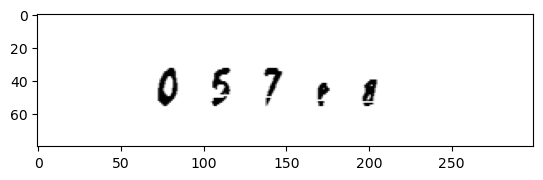

In [5]:
plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap="gray")

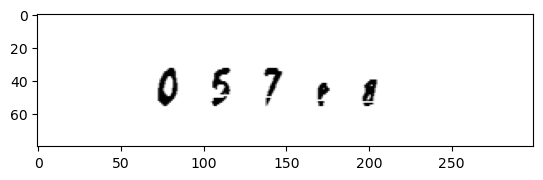

In [6]:
plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap="gray")

In [7]:
train_dataset[10]

{'images': tensor([[[2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          ...,
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489]]]),
 'targets': tensor([ 1,  2,  9, 22, -1, -1, -1, -1])}